<a href="https://colab.research.google.com/github/quarcs-lab/pysalnarsc19/blob/master/content/300_spatial_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatial Weights


Spatial weights are mathematical structures used to represent spatial relationships. Many spatial analytics, such as spatial autocorrelation statistics and regionalization algorithms rely on spatial weights. Generally speaking, a spatial weight $w_{i,j}$ expresses the notion of a geographical relationship between locations $i$ and $j$. These relationships can be based on a number of criteria including contiguity, geospatial distance and general distances.

libpysal offers functionality for the construction, manipulation, analysis, and conversion of a wide array of spatial weights.

We begin with construction of weights from common spatial data formats.


# Setup

## Install libraries

In [0]:
!pip install -q geopandas
!pip install -q seaborn
!pip install -q shapely

In [2]:
!pip install -q libpysal

     |████████████████████████████████| 2.4MB 5.0MB/s 


In [3]:
!pip install -q mapclassify

     |████████████████████████████████| 51kB 2.5MB/s 


In [4]:
!pip install -q splot

     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 266kB 7.1MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 235kB 7.2MB/s 


In [0]:
!pip install -q legendgram

## Load libraries

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import geopandas
import shapely
import mapclassify
import legendgram
import splot
from splot.mapping import vba_choropleth
from splot._viz_utils import shift_colormap
import libpysal 
from libpysal.weights import Queen, Rook, KNN, Kernel


## Load data from Github 

In [7]:
# It will be cloned for about a 12 hours. That is, you have to re-run this code only after 12 hours
 !git clone --recursive https://github.com/quarcs-lab/pysalnarsc19.git

Cloning into 'pysalnarsc19'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 406 (delta 40), reused 32 (delta 14), pack-reused 318
Receiving objects: 100% (406/406), 74.46 MiB | 25.25 MiB/s, done.
Resolving deltas: 100% (165/165), done.
Checking out files: 100% (155/155), done.


In [8]:
# Let us see what we have inside content/data Folder
 !ls pysalnarsc19/content/data

airbnb.cpg			  neighborhoods.csv
airbnb.dbf			  neighborhoods.gpkg
airbnb.prj			  neighbourhoods.geojson
airbnb.shp			  participants2016.csv
airbnb.shx			  participants2017.csv
airports.csv			  participants2018.csv
b500.cpg			  README.md
b500.dbf			  riverside_city.dbf
b500.prj			  riverside_city.prj
b500.shp			  riverside_city.qpj
b500.shx			  riverside_city.shp
behavioralHealth.dbf		  riverside_city.shx
behavioralHealth.prj		  san_diego.cpg
behavioralHealth.qpj		  san_diego.dbf
behavioralHealth.shp		  san_diego.prj
behavioralHealth.shx		  san_diego.shp
CAINC1__ALL_STATES_1969_2017.csv  san_diego.shx
CAINC1__definition.xml		  san_diego.tif
CAINC1__Footnotes.html		  sd_tracts_acs_clean.dbf
california_tracts.cpg		  sd_tracts_acs_clean.prj
california_tracts.dbf		  sd_tracts_acs_clean.qpj
california_tracts.prj		  sd_tracts_acs_clean.shp
california_tracts.shp		  sd_tracts_acs_clean.shx
california_tracts.shx		  texas.dbf
city_tracts.cpg			  texas.geojson
city_tracts.dbf			  texas.prj
city_t

In [0]:
# Load data (from cloned repository)
# db = geopandas.read_file('pysalnarsc19/content/data/texas.shp')

There are functions to construct weights directly from a file path. 

## Contiguity



#### Queen Weights

A commonly-used type of weight is a queen contigutiy weight, which reflects adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a vertex with another polygon. These weights are symmetric, in that when polygon $A$ neighbors polygon $B$, both $w_{AB} = 1$ and $w_{BA} = 1$.

To construct queen weights from a shapefile, we will use geopandas to read the file into a GeoDataFrame, and then use   libpysal to construct the weights:

In [12]:
df = geopandas.read_file('pysalnarsc19/content/data/texas.shp')
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3406,3486,3766,3143,-0.917852,-0.602338,-0.355503,-0.605607,-1.514026,-1.449058,-1.476411,-1.571799,2.0,1.7,1.941176,1.732852,1.494886,2.270948,3.516484,6.101695,32.4,34.3,31.0,35.8,8.133294,8.156510,8.233769,8.052933,1.293817,1.317034,1.395364,1.215386,8.531885,8.970432,9.802064,10.252241,22.4,12.1,10.851263,9.140370,0.029360,0.028686,0.026553,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,"POLYGON ((-100.00687 36.49388, -100.00114 36.4..."
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,18.229879,10.501995,0.000000,0.0,0.666667,0.333333,0.000000,2605,3657,3174,2858,-1.113594,-1.081211,-0.492131,-0.519201,-1.714700,-1.407486,-1.597010,-1.635240,3.6,3.6,1.230349,3.343239,2.297593,2.511774,3.807947,5.968779,29.6,26.3,31.7,34.4,7.865188,8.204398,8.062748,7.957877,1.045172,1.384382,1.235227,1.130140,8.666130,9.038840,9.854087,10.178274,20.1,7.7,8.459870,10.761790,0.000000,0.464862,0.126024,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,"POLYGON ((-102.16757 36.05463, -102.16522 36.4..."
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,11.088933,5.103864,18.311665,0.0,0.666667,0.333333,1.000000,6302,6012,6531,5461,-0.470982,-0.175927,0.139469,0.258405,-1.200047,-1.204341,-1.234283,-1.338314,2.4,4.5,2.239602,2.276423,3.446752,3.973820,4.849785,8.396560,31.3,30.2,29.0,32.6,8.748622,8.701513,8.784315,8.605387,1.439410,1.392300,1.467435,1.288972,8.454466,8.861208,9.571784,10.062285,29.9,14.7,14.922907,15.994962,0.920343,1.829674,2.526412,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,"POLYGON ((-102.16757 36.05463, -103.02356 36.0..."
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6208,6351,6209,5848,-1.248299,-0.896143,-0.684286,-0.521268,-1.039568,-0.999173,-1.109016,-1.132594,1.0,3.8,1.818806,4.007634,2.479733,3.466907,4.626027,6.238185,25.6,27.5,29.9,32.9,8.733594,8.756368,8.733755,8.673855,1.923452,1.946225,1.908512,1.849590,8.686261,9.041093,9.958165,10.320585,15.1,8.2,8.371041,9.683313,0.112758,0.000000,0.032211,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,"POLYGON ((-101.61950 36.05471, -101.62032 36.4..."
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,6.870019,10.429704,3.651767,0.0,0.666667,1.000000,0.333333,9380,9704,9588,9128,-1.565398,-1.125893,-1.330064,-0.463557,-0.720305,-0.688084,-0.792819,-0.819903,2.4,4.1,2.162044,4.874067,2.364439,3.163235,5.366528,7.104154,25.1,27.0,28.2,31.5,9.146335,9.180293,9.168268,9.119102,2.336193,2.370151,2.345090,2.297340,8.715388,9.153453,10.011490,10.317086,11.1,6.7,5.459240,10.735736,0.000000,0.000000,0.020859,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,"POLYGON ((-101.08231 36.05626, -101.08967 36.4..."


In [0]:
qW = Queen.from_dataframe(df)

In [14]:
qW

All weights objects have a few traits that you can use to work with the weights object, as well as to get information about the weights object. 

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [15]:
qW[155] #neighbors & weights of the 156th observation (0-index remember)

{127: 1.0, 138: 1.0, 139: 1.0, 154: 1.0, 159: 1.0, 171: 1.0}

By default, the weights and the pandas dataframe will use the same index. So, we can view the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list:

In [16]:
self_and_neighbors = [155]
self_and_neighbors.extend(qW.neighbors[155])
print(self_and_neighbors)

[155, 159, 154, 138, 139, 171, 127]


and grabbing those elements from the dataframe:

In [17]:
df.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
155,Lampasas,Texas,48,281,48281,48,281,48281,1,0.000000,3.575387,8.329863,4.930602,0.000000,0.333333,1.000000,0.666667,9418,9323,12005,13521,0.243071,0.268801,0.169387,0.166756,-0.640417,-0.643923,-0.546498,-0.463411,2.9,3.6,6.641366,9.278518,2.582232,2.434077,4.935477,6.512945,34.5,35.1,33.6,35.4,9.150378,9.140240,9.393079,9.511999,2.562828,2.552690,2.822056,2.943781,8.135640,8.668196,9.575608,10.208985,43.4,18.7,13.443114,16.235670,3.026120,1.544567,1.382757,1.982102,0.335017,0.402855,0.390354,0.393445,10.989441,7.8,8.652695,12.023460,"POLYGON ((-97.91265 31.04269, -98.43662 31.031..."
159,Bell,Texas,48,027,48027,48,27,48027,1,4.959421,6.426580,13.089364,12.210779,4.666667,8.000000,20.666667,23.333333,94097,124483,157889,191088,-0.212322,0.027117,0.352923,0.272395,1.007528,1.136941,1.195925,1.264606,4.8,6.4,7.438314,9.020128,2.940461,2.762976,5.360818,7.448412,24.7,23.1,24.9,27.8,11.452081,11.731924,11.969648,12.160489,4.480413,4.778240,5.008541,5.195409,8.289288,8.823059,9.616405,10.197313,31.9,14.5,13.356264,12.218254,11.319171,12.670003,16.386829,18.889203,0.296351,0.378957,0.382181,0.386888,9.810410,8.2,10.025676,13.709190,"POLYGON ((-97.83271 30.91687, -97.91265 31.042..."
154,San Saba,Texas,48,411,48411,48,411,48411,1,5.223842,6.016847,10.745755,6.171697,0.333333,0.333333,0.666667,0.333333,6381,5540,6204,5401,0.566318,1.329367,0.683068,1.345917,-1.091050,-1.169131,-1.178914,-1.255508,3.4,2.3,2.116183,5.235602,2.285952,2.763221,4.446382,6.237525,41.1,43.3,40.1,39.1,8.761080,8.619750,8.732950,8.594339,1.739996,1.598666,1.697329,1.560392,7.966587,8.418036,9.429155,9.838416,51.8,30.8,18.046830,26.935804,0.736562,0.523466,0.709220,0.259211,0.374866,0.469212,0.412534,0.447820,9.497207,9.0,7.595660,11.317009,"POLYGON ((-98.95845 30.92357, -99.09010 30.924..."
138,Mills,Texas,48,333,48333,48,333,48333,1,7.462130,7.913897,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,4467,4212,4477,4531,0.515215,0.486768,0.029240,0.266306,-1.221168,-1.230605,-1.278063,-1.245105,1.4,1.5,3.058438,2.686404,1.270942,2.049427,3.733487,5.899198,44.6,48.3,46.2,42.8,8.404472,8.345693,8.406708,8.418698,1.805963,1.747184,1.789172,1.801028,7.956477,8.604654,9.461099,9.945061,52.3,23.8,13.958641,16.654050,0.022386,0.000000,0.111682,0.220702,0.378945,0.424433,0.372892,0.399459,8.283582,6.2,5.760709,7.267222,"POLYGON ((-98.56595 31.23529, -98.58150 31.263..."
139,Coryell,Texas,48,099,48099,48,99,48099,1,2.782299,4.719965,2.348782,4.671951,0.666667,1.666667,1.333333,3.000000,23961,35311,56767,64213,-0.091149,-0.108423,0.061248,-0.343404,-0.043044,0.213602,0.452570,0.502862,3.5,4.7,9.745729,10.097533,2.354154,2.190124,3.438534,5.788500,23.9,22.0,22.6,25.4,10.084183,10.471950,10.946710,11.069961,3.134326,3.522093,3.983899,4.111608,8.174985,8.784162,9.514880,10.131420,40.5,15.8,11.932347,9.048248,5.396269,9.042508,18.979337,21.167053,0.314801,0.354336,0.351261,0.335440,7.955449,8.0,7.230444,9.554187,"POLYGON ((-97.90811 31.07368, -98.17923 31.464..."
171,Burnet,Texas,48,053,48053,48,53,48053,1,0.000000,11.675423,3.744687,5.879673,0.000000,1.333333,0.666667,1.333333,9265,11420,17803,22677,0.059999,0.490960,-0.007158,0.195426,-0.762127,-0.599528,-0.369362,-0.208512,2.8,2.3,4.193849,6.429798,1.906780,2.229373,4.045734,7.835341,35.4,43.1,41.5,40.0,9.133999,9.343121,9.787122,10.029106,2.230252,2.439374,2.885284,3.126062,8.220134,8.711114,9.555135,10.137611,39.8,21.0,11.653658,14.569339,1.845656,1.593695,1.555918,1.186224,0.327508,0.449285,0.385079,0.405890,10.774142,6.5,7.115629,10.568742,"POLYGON ((-98.34818 30.49785, -98.34894 30.565..."
127,Hamilton,Texas,48,193,48

A full, dense matrix describing all of the pairwise relationships is constructed using the `.full` method, or when `libpysal.weights.full` is called on a weights object:

In [0]:
Wmatrix, ids = qW.full()
#Wmatrix, ids = libpysal.weights.full(qW)

In [19]:
Wmatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [0]:
n_neighbors = Wmatrix.sum(axis=1) # how many neighbors each region has

In [21]:
n_neighbors[155]

6.0

In [22]:
qW.cardinalities[155]

6

Note that this matrix is binary, in that its elements are either zero or one, since an observation is either a neighbor or it is not a neighbor. 

However, many common use cases of spatial weights require that the matrix is row-standardized. This is done simply in PySAL using the `.transform` attribute

In [0]:
qW.transform = 'r'

Now, if we build a new full matrix, its rows should sum to one:

In [0]:
Wmatrix, ids = qW.full()

In [25]:
Wmatrix.sum(axis=1) #numpy axes are 0:column, 1:row, 2:facet, into higher dimensions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Since weight matrices are typically very sparse, there is also a sparse weights matrix constructor:

In [26]:
qW.sparse

<254x254 sparse matrix of type '<class 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [27]:
qW.pct_nonzero #Percentage of nonzero neighbor counts

2.263004526009052

Let's look at the neighborhoods of the 101th observation - Howard County, Texas

In [28]:
df.iloc[100]

NAME                                                     Howard
STATE_NAME                                                Texas
STATE_FIPS                                                   48
CNTY_FIPS                                                   227
FIPS                                                      48227
                                    ...                        
FH60                                                     8.3283
FH70                                                        7.9
FH80                                                    11.0435
FH90                                                    15.3374
geometry      POLYGON ((-101.2665557861328 32.09101486206055...
Name: 100, Length: 70, dtype: object

In [29]:
qW.neighbors[100]

[84, 101, 85, 86, 104, 117, 118]

In [30]:
len(qW.neighbors[100])

7

In [31]:
df.iloc[qW.neighbors[100]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
84,Scurry,Texas,48,415,48415,48,415,48415,1,3.272947,6.345178,10.993843,7.155379,0.666667,1.000000,2.000000,1.333333,20369,15760,18192,18634,-1.104083,-0.357249,-0.443955,-0.097142,-0.119351,-0.331129,-0.321013,-0.314724,5.1,3.0,3.092784,7.327475,2.152642,2.055039,4.077641,7.303603,26.1,32.1,29.4,32.6,9.921769,9.665230,9.808737,9.832743,3.114940,2.858401,3.006009,3.027464,8.618847,8.956480,9.839322,10.243987,19.9,14.2,8.988981,13.718187,2.788551,3.166244,3.331135,4.717184,0.257733,0.377475,0.378368,0.387530,7.060163,6.6,8.370385,9.228223,"POLYGON ((-100.66333 32.52182, -101.17827 32.5..."
101,Mitchell,Texas,48,335,48335,48,335,48335,1,2.961647,3.673904,11.003521,8.316700,0.333333,0.333333,1.000000,0.666667,11255,9073,9088,8016,-0.242511,0.460482,0.705262,0.780999,-0.584253,-0.742126,-0.829298,-0.908270,4.0,6.3,2.492468,6.735087,1.515152,2.328469,3.439727,6.386671,28.9,35.5,34.1,37.3,9.328568,9.113058,9.114710,8.989195,2.504194,2.288685,2.298851,2.175640,8.314587,8.822912,9.620461,9.992734,34.2,22.8,16.165560,17.713511,7.374500,6.734267,5.182658,4.528443,0.308195,0.427075,0.429193,0.429171,8.922323,8.0,10.425615,12.516945,"POLYGON ((-100.66947 32.08794, -100.81491 32.0..."
85,Borden,Texas,48,033,48033,48,33,48033,1,92.936803,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1076,888,859,799,-0.764209,-1.018203,0.105040,-0.415848,-2.395226,-2.442903,-2.537669,-2.519505,6.9,1.2,1.759531,2.842377,2.564103,0.598802,2.431611,6.451613,28.0,34.1,32.0,36.3,6.981006,6.788972,6.755769,6.683361,0.170863,-0.021171,-0.046292,-0.117811,8.565412,8.970432,9.675583,10.354754,29.6,10.5,14.396887,10.460251,0.000000,0.000000,0.349243,0.250313,0.316676,0.331702,0.430273,0.410525,5.574913,3.1,2.723735,4.602510,"POLYGON ((-101.17827 32.52311, -101.68996 32.5..."
86,Dawson,Texas,48,115,48115,48,115,48115,1,8.687343,14.052839,6.178942,16.261296,1.666667,2.333333,1.000000,2.333333,19185,16604,16184,14349,-0.374730,0.516940,0.106779,1.133869,-0.164909,-0.292115,-0.406818,-0.497589,5.8,5.3,2.483620,9.697733,2.241028,2.487291,3.422326,5.569974,25.1,27.4,29.1,32.7,9.861884,9.717399,9.691778,9.571436,3.057269,2.912784,2.886388,2.766710,8.467372,8.849801,9.702411,9.998252,28.0,22.0,14.724210,24.582899,5.519937,5.257769,3.935986,4.334797,0.319099,0.450096,0.400927,0.441837,9.756098,7.8,6.738980,12.069864,"POLYGON ((-101.68996 32.52256, -102.20550 32.5..."
104,Martin,Texas,48,317,48317,48,317,48317,1,0.000000,13.964530,7.116425,0.000000,0.000000,0.666667,0.333333,0.000000,5068,4774,4684,4956,-0.984342,0.460384,-0.154821,0.284980,-1.198026,-1.210082,-1.311162,-1.246778,4.5,3.6,2.905199,7.509063,1.789838,2.603844,2.910855,4.643064,25.0,27.0,29.9,30.7,8.530702,8.470940,8.451908,8.508354,1.716159,1.656397,1.634296,1.689539,8.639588,8.792246,9.865630,10.113059,17.9,25.0,12.429379,16.956851,4.123915,3.435274,2.519214,1.795803,0.271493,0.431611,0.431032,0.414783,8.448416,6.8,3.228410,7.948524,"POLYGON ((-101.77436 32.08827, -102.21136 32.0..."
117,Sterling,Texas,48,431,48431,48,431,48431,1,28.320589,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1177,1056,1206,1438,-0.469640,0.123407,0.395886,-0.324695,-2.328478,-2.318292,-2.299682,-2.116486,1.0,0.7,0.383877,2.250804,2.736318,2.638522,2.298851,5.050505,30.5,30.5,29.9,30.3,7.070724,6.962243,7.095064,7.271009,0.252894,0.144413,0.267543,0.442946,8.501876,8.813141,9.643226,10.293196,29.5,19.5,14.411765,10.880829,0.764656,0.378788,0.414594,0.000000,0.322944,0.401901,0.423753,0.391542,8.888889,7.8,8.823529,8.549223,"POLYGON ((-101.26936 31.65358, -101.26656 32.0..."
118,Glasscock,Texas,48,173,48173,48,17

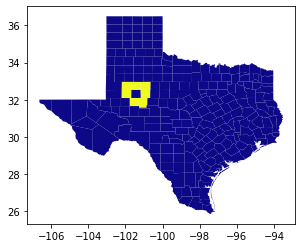

In [32]:
df.assign(weights = qW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')           

By default, PySAL assigns each observation an index according to the order in which the observation was read in. This means that, by default, all of the observations in the weights object are indexed by table order.

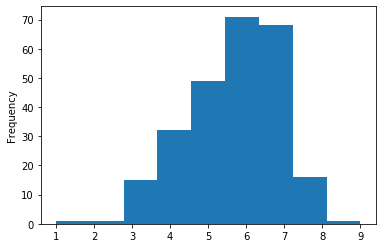

In [35]:
pandas.Series(qW.cardinalities).plot.hist(bins=9)

In [0]:
qW.cardinalities.values()

#### Rook Weights

Rook weights are another type of contiguity weight, but consider observations as neighboring only when they share an edge. The rook neighbors of an observation may be different than its queen neighbors, depending on how the observation and its nearby polygons are configured. 

We can construct this in the same way as the queen weights:

In [0]:
rW = Rook.from_dataframe(df)

In [37]:
rW.neighbors[100]

[101, 85, 118, 104, 117]

In [38]:
len(rW.neighbors[100])

5

In [39]:
df.iloc[rW.neighbors[100]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
101,Mitchell,Texas,48,335,48335,48,335,48335,1,2.961647,3.673904,11.003521,8.3167,0.333333,0.333333,1.000000,0.666667,11255,9073,9088,8016,-0.242511,0.460482,0.705262,0.780999,-0.584253,-0.742126,-0.829298,-0.908270,4.0,6.3,2.492468,6.735087,1.515152,2.328469,3.439727,6.386671,28.9,35.5,34.1,37.3,9.328568,9.113058,9.114710,8.989195,2.504194,2.288685,2.298851,2.175640,8.314587,8.822912,9.620461,9.992734,34.2,22.8,16.165560,17.713511,7.374500,6.734267,5.182658,4.528443,0.308195,0.427075,0.429193,0.429171,8.922323,8.0,10.425615,12.516945,"POLYGON ((-100.66947 32.08794, -100.81491 32.0..."
85,Borden,Texas,48,033,48033,48,33,48033,1,92.936803,0.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1076,888,859,799,-0.764209,-1.018203,0.105040,-0.415848,-2.395226,-2.442903,-2.537669,-2.519505,6.9,1.2,1.759531,2.842377,2.564103,0.598802,2.431611,6.451613,28.0,34.1,32.0,36.3,6.981006,6.788972,6.755769,6.683361,0.170863,-0.021171,-0.046292,-0.117811,8.565412,8.970432,9.675583,10.354754,29.6,10.5,14.396887,10.460251,0.000000,0.000000,0.349243,0.250313,0.316676,0.331702,0.430273,0.410525,5.574913,3.1,2.723735,4.602510,"POLYGON ((-101.17827 32.52311, -101.68996 32.5..."
118,Glasscock,Texas,48,173,48173,48,173,48173,1,0.000000,57.720058,25.562372,0.0000,0.000000,0.666667,0.333333,0.000000,1118,1155,1304,1447,-1.360216,0.130805,0.546586,-0.118972,-2.348459,-2.233559,-2.234819,-2.104172,0.0,0.0,0.817996,2.229846,2.341920,2.827763,3.017241,3.917910,28.3,24.5,25.3,28.2,7.019297,7.051856,7.173192,7.277248,0.258882,0.291441,0.370353,0.473964,8.692154,8.865453,9.706194,10.406321,14.7,20.6,17.575758,16.981132,1.162791,0.519481,0.076687,0.000000,0.255656,0.447957,0.473217,0.415726,5.653710,3.8,2.424242,5.660377,"POLYGON ((-101.26936 31.65358, -101.77174 31.6..."
104,Martin,Texas,48,317,48317,48,317,48317,1,0.000000,13.964530,7.116425,0.0000,0.000000,0.666667,0.333333,0.000000,5068,4774,4684,4956,-0.984342,0.460384,-0.154821,0.284980,-1.198026,-1.210082,-1.311162,-1.246778,4.5,3.6,2.905199,7.509063,1.789838,2.603844,2.910855,4.643064,25.0,27.0,29.9,30.7,8.530702,8.470940,8.451908,8.508354,1.716159,1.656397,1.634296,1.689539,8.639588,8.792246,9.865630,10.113059,17.9,25.0,12.429379,16.956851,4.123915,3.435274,2.519214,1.795803,0.271493,0.431611,0.431032,0.414783,8.448416,6.8,3.228410,7.948524,"POLYGON ((-101.77436 32.08827, -102.21136 32.0..."
117,Sterling,Texas,48,431,48431,48,431,48431,1,28.320589,0.000000,0.000000,0.0000,0.333333,0.000000,0.000000,0.000000,1177,1056,1206,1438,-0.469640,0.123407,0.395886,-0.324695,-2.328478,-2.318292,-2.299682,-2.116486,1.0,0.7,0.383877,2.250804,2.736318,2.638522,2.298851,5.050505,30.5,30.5,29.9,30.3,7.070724,6.962243,7.095064,7.271009,0.252894,0.144413,0.267543,0.442946,8.501876,8.813141,9.643226,10.293196,29.5,19.5,14.411765,10.880829,0.764656,0.378788,0.414594,0.000000,0.322944,0.401901,0.423753,0.391542,8.888889,7.8,8.823529,8.549223,"POLYGON ((-101.26936 31.65358, -101.26656 32.0..."


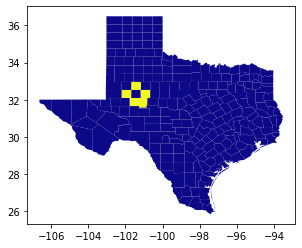

In [40]:
df.assign(weights = rW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')

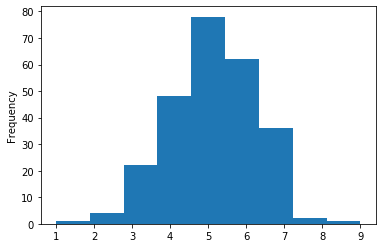

In [41]:
pandas.Series(rW.cardinalities).plot.hist(bins=9)

#### Bishop Weights

In theory, a "Bishop" weighting scheme is one that arises when only polygons that share vertexes are considered to be neighboring. But, since Queen contiguigy requires either an edge or a vertex and Rook contiguity requires only shared edges, the following relationship is true:

$$ \mathcal{Q} = \mathcal{R} \cup \mathcal{B} $$

where $\mathcal{Q}$ is the set of neighbor pairs *via* queen contiguity, $\mathcal{R}$ is the set of neighbor pairs *via* Rook contiguity, and $\mathcal{B}$ *via* Bishop contiguity. Thus:

$$ \mathcal{Q} \setminus \mathcal{R} = \mathcal{B}$$

Bishop weights entail all Queen neighbor pairs that are not also Rook neighbors.

PySAL does not have a dedicated bishop weights constructor, but you can construct very easily using the `w_difference` function. This function is one of a family of tools to work with weights, all defined in `libpysal.weights`, that conduct these types of set operations between weight objects.

In [42]:
bW = libpysal.weights.w_difference(qW, rW, constrained=False)

/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 183 disconnected components.
 There are 161 islands with ids: 19, 20, 21, 22, 23, 24, 25, 26, 34, 36, 37, 39, 40, 42, 52, 54, 55, 56, 57, 58, 59, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 102, 103, 107, 108, 109, 112, 113, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 127, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216, 219, 220, 221, 222, 223, 225, 226, 227, 231, 232, 233, 236, 237, 238, 240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253.
  warnings.warn(message)


In [43]:
bW = libpysal.weights.w_difference(qW, rW, constrained=False)

/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 183 disconnected components.
 There are 161 islands with ids: 19, 20, 21, 22, 23, 24, 25, 26, 34, 36, 37, 39, 40, 42, 52, 54, 55, 56, 57, 58, 59, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 102, 103, 107, 108, 109, 112, 113, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 127, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216, 219, 220, 221, 222, 223, 225, 226, 227, 231, 232, 233, 236, 237, 238, 240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253.
  warnings.warn(message)


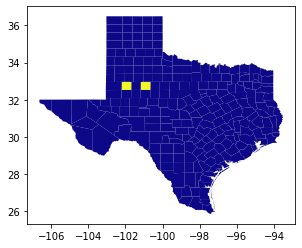

In [44]:
df.assign(weights = bW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')

In [45]:
bW.histogram

[(0, 161), (1, 48), (2, 33), (3, 8), (4, 4)]

Thus, the vast majority of counties have no bishop neighbors. But, a few do. A simple way to see these observations in the dataframe is to find all elements of the dataframe that are not "islands," the term for an observation with no neighbors:

In [0]:
islands = bW.islands

In [47]:
bW

In [48]:
# Using `.head()` to limit the number of rows printed
df.query('FIPS not in @islands').head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3406,3486,3766,3143,-0.917852,-0.602338,-0.355503,-0.605607,-1.514026,-1.449058,-1.476411,-1.571799,2.0,1.7,1.941176,1.732852,1.494886,2.270948,3.516484,6.101695,32.4,34.3,31.0,35.8,8.133294,8.156510,8.233769,8.052933,1.293817,1.317034,1.395364,1.215386,8.531885,8.970432,9.802064,10.252241,22.4,12.1,10.851263,9.140370,0.029360,0.028686,0.026553,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,"POLYGON ((-100.00687 36.49388, -100.00114 36.4..."
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,18.229879,10.501995,0.000000,0.0,0.666667,0.333333,0.000000,2605,3657,3174,2858,-1.113594,-1.081211,-0.492131,-0.519201,-1.714700,-1.407486,-1.597010,-1.635240,3.6,3.6,1.230349,3.343239,2.297593,2.511774,3.807947,5.968779,29.6,26.3,31.7,34.4,7.865188,8.204398,8.062748,7.957877,1.045172,1.384382,1.235227,1.130140,8.666130,9.038840,9.854087,10.178274,20.1,7.7,8.459870,10.761790,0.000000,0.464862,0.126024,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,"POLYGON ((-102.16757 36.05463, -102.16522 36.4..."
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,11.088933,5.103864,18.311665,0.0,0.666667,0.333333,1.000000,6302,6012,6531,5461,-0.470982,-0.175927,0.139469,0.258405,-1.200047,-1.204341,-1.234283,-1.338314,2.4,4.5,2.239602,2.276423,3.446752,3.973820,4.849785,8.396560,31.3,30.2,29.0,32.6,8.748622,8.701513,8.784315,8.605387,1.439410,1.392300,1.467435,1.288972,8.454466,8.861208,9.571784,10.062285,29.9,14.7,14.922907,15.994962,0.920343,1.829674,2.526412,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,"POLYGON ((-102.16757 36.05463, -103.02356 36.0..."
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6208,6351,6209,5848,-1.248299,-0.896143,-0.684286,-0.521268,-1.039568,-0.999173,-1.109016,-1.132594,1.0,3.8,1.818806,4.007634,2.479733,3.466907,4.626027,6.238185,25.6,27.5,29.9,32.9,8.733594,8.756368,8.733755,8.673855,1.923452,1.946225,1.908512,1.849590,8.686261,9.041093,9.958165,10.320585,15.1,8.2,8.371041,9.683313,0.112758,0.000000,0.032211,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,"POLYGON ((-101.61950 36.05471, -101.62032 36.4..."
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,6.870019,10.429704,3.651767,0.0,0.666667,1.000000,0.333333,9380,9704,9588,9128,-1.565398,-1.125893,-1.330064,-0.463557,-0.720305,-0.688084,-0.792819,-0.819903,2.4,4.1,2.162044,4.874067,2.364439,3.163235,5.366528,7.104154,25.1,27.0,28.2,31.5,9.146335,9.180293,9.168268,9.119102,2.336193,2.370151,2.345090,2.297340,8.715388,9.153453,10.011490,10.317086,11.1,6.7,5.459240,10.735736,0.000000,0.000000,0.020859,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,"POLYGON ((-101.08231 36.05626, -101.08967 36.4..."


## Distance

There are many other kinds of weighting functions in PySAL. Another separate type use a continuous measure of distance to define neighborhoods. 

In [49]:
radius_mile = libpysal.cg.sphere.RADIUS_EARTH_MILES
radius_mile

3958.755865744055

great circle (arc) distance -  maximum nearest neighbor distance in miles between the $n$ observations

In [0]:
threshold = libpysal.weights.min_threshold_dist_from_shapefile("pysalnarsc19/content/data/texas.shp",
                                                               radius=radius_mile) 

In [53]:
threshold

60.47758554135752

In [54]:
radius_km = libpysal.cg.sphere.RADIUS_EARTH_KM
radius_km

6371.0

In [56]:
libpysal.weights.min_threshold_dist_from_shapefile("pysalnarsc19/content/data/texas.shp",
                                                               radius=radius_km) 

97.32923942547046

In [57]:
libpysal.weights.min_threshold_dist_from_shapefile("pysalnarsc19/content/data/texas.shp")

1.0040319244447573

### knn defined weights

In [0]:
knn4_bad = KNN.from_dataframe(df, k=4) # ignore curvature of the earth

In [59]:
knn4_bad.histogram

[(4, 254)]

In [0]:
knn4 = KNN.from_dataframe(df, k=4, radius=radius_mile)

In [61]:
knn4.histogram

[(4, 254)]

In [62]:
knn4[0]

{3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [63]:
knn4_bad[0]

{4: 1.0, 5: 1.0, 6: 1.0, 13: 1.0}

In [64]:
knn4_bad.neighbors == knn4.neighbors

False

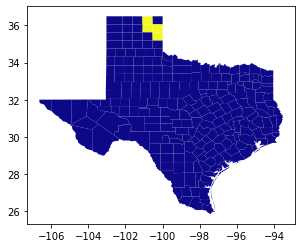

In [65]:

df.assign(weights = 
          knn4_bad.sparse[0,:].toarray().flatten()).plot('weights', 
                                                           cmap='plasma')

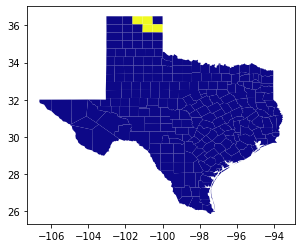

In [66]:

df.assign(weights = 
          knn4.sparse[0,:].toarray().flatten()).plot('weights', 
                                                           cmap='plasma')

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br>
Enumerate the counties for which ignoring curvature results in an incorrect neighbor set for knn.
</div>

In [0]:
# %load solutions/300_1.py

### Kernel W

Kernel Weights are continuous distance-based weights that use kernel densities to define the neighbor relationship.
Typically, they estimate a `bandwidth`, which is a parameter governing how far out observations should be considered neighboring. Then, using this bandwidth, they evaluate a continuous kernel function to provide a weight between 0 and 1.

Many different choices of kernel functions are supported, and bandwidths can either be fixed (constant over all units) or adaptive in function of unit density.

For example, if we want to use **adaptive bandwidths for the map and weight according to a gaussian kernel**:

#### Adaptive gaussian kernel weights

bandwidth = the distance to the kth nearest neighbor for each
                  observation
   
bandwith is changing across observations

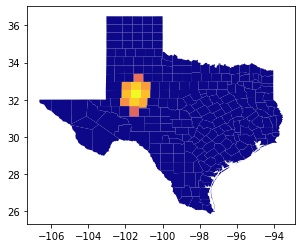

In [67]:
kernelWa = Kernel.from_dataframe(df, k=10, fixed=False, function='gaussian')
df.assign(weights = 
          kernelWa.sparse[100,:].toarray().flatten()).plot('weights', 
                                                           cmap='plasma')

In [68]:
kernelWa.bandwidth

array([[1.41792307],
       [1.16186765],
       [1.51532266],
       [1.16706641],
       [1.16051064],
       [1.02910576],
       [1.17033966],
       [1.02887826],
       [1.31356614],
       [1.0256787 ],
       [0.88773322],
       [0.88526614],
       [0.88179061],
       [1.08662339],
       [1.22270045],
       [0.89732036],
       [0.89442955],
       [1.0327589 ],
       [0.88819223],
       [1.12280474],
       [1.05295281],
       [0.94862185],
       [0.95000665],
       [0.92211746],
       [1.00000484],
       [0.92083932],
       [1.05944729],
       [1.05898297],
       [0.9017759 ],
       [0.90650946],
       [0.90032068],
       [0.89957   ],
       [0.92902449],
       [1.09851391],
       [0.98062729],
       [1.08796014],
       [1.07679596],
       [1.05234301],
       [0.88935744],
       [1.05377653],
       [1.04809952],
       [0.90585612],
       [1.0087307 ],
       [0.88937573],
       [0.92083932],
       [0.92211746],
       [0.92258946],
       [0.965

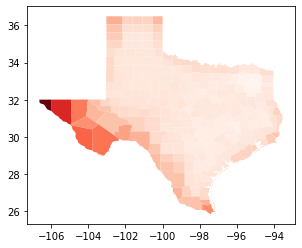

In [69]:
df.assign(bw=kernelWa.bandwidth.flatten()).plot('bw', cmap='Reds')

**fixed bandwidths for the map and weight according to a gaussian kernel**

bandwidth = maximum of (the distances to the kth nearest neighbor for all observations)

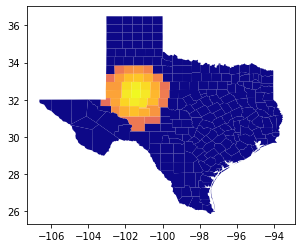

In [70]:
kernelWa = Kernel.from_dataframe(df, k=2, fixed=True, function='gaussian')

df.assign(weights=kernelWa.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')


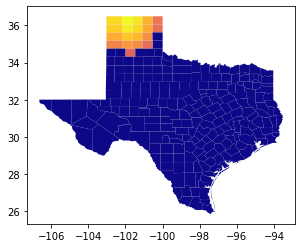

In [71]:
kernelWa = Kernel.from_dataframe(df, k=2, fixed=True, function='gaussian')

df.assign(weights=kernelWa.sparse[1,:].toarray().flatten()).plot('weights', cmap='plasma')

In [72]:
kernelWa.bandwidth

array([[1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.755

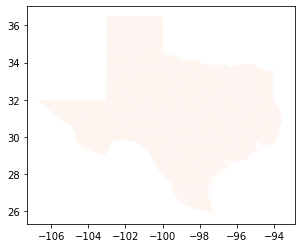

In [73]:
df.assign(bw=kernelWa.bandwidth.flatten()).plot('bw', cmap='Reds')

## Block Weights

In [0]:
w,s,e,n = df.total_bounds

In [0]:
mx = (w+e)/2
my = (n+s)/2

In [0]:
# import shapely

In [0]:
centroids = df.geometry.centroid

In [0]:
lon = centroids.apply(lambda p: p.x).values
lat = centroids.apply(lambda p: p.y).values

In [0]:
north = lat > my
south = lat <= my
east = lon > mx
west = lon <= mx

In [0]:
nw = west * north * 2
ne = east * north * 1
sw = west * south * 3
se = east * south *4
quad = nw + ne + sw + se

In [82]:
quad

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

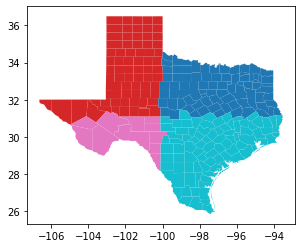

In [83]:
df['quad'] = quad
df.plot(column="quad", categorical=True)

In [84]:
blockW = libpysal.weights.block_weights(df["quad"])

/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


In [85]:
blockW.n

254

In [86]:
blockW.pct_nonzero

30.31186062372125

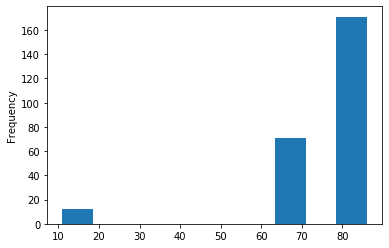

In [87]:
pandas.Series(blockW.cardinalities).plot.hist()

In [88]:
df.groupby(by='quad').count()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,HR70,HR80,HR90,HC60,HC70,HC80,HC90,PO60,PO70,PO80,PO90,RD60,RD70,RD80,RD90,PS60,PS70,PS80,PS90,UE60,UE70,UE80,UE90,DV60,DV70,DV80,DV90,MA60,MA70,MA80,MA90,POL60,POL70,POL80,POL90,DNL60,DNL70,DNL80,DNL90,MFIL59,MFIL69,MFIL79,MFIL89,FP59,FP69,FP79,FP89,BLK60,BLK70,BLK80,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
quad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
2,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
4,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3182454780>)

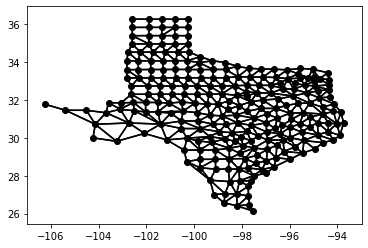

In [89]:
rW.plot(df)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3182448160>)

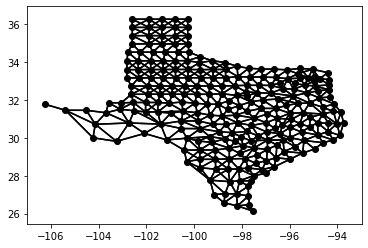

In [90]:
qW.plot(df)

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br>
    Which spatial weights structure would be more dense, Texas counties based on rook contiguity or Texas counties based on knn with k=4?
</div>

In [0]:
# %load solutions/300_2.py

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br>
    Which counties have fewer neighbors under rook contiguity relative to knn4?
</div>

In [0]:
# %load solutions/300_3.py

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br>
    Which counties have identicical neighbors under queen contiguity and queen rook contiguity?
</div>

In [0]:
# %load solutions/300_4.py

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Spatial Weights</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.